In [ ]:
df = pd.read_csv(r"public.test.csv")

df.drop_duplicates(df.columns.drop('ID'), keep='first', inplace=True)
df.drop(df[(df.电压A > 800) | (df.电压A < 500)].index,inplace=True)
df.drop(df[(df.电压B > 800) | (df.电压B < 500)].index,inplace=True)
df.drop(df[(df.电压C > 800) | (df.电压C < 500)].index,inplace=True)
df.drop(df[(df.现场温度 > 30) | (df.电压B < -30)].index,inplace=True)
df.drop(df[(df.转换效率A > 100)].index,inplace=True)
df.drop(df[(df.转换效率B > 100)].index,inplace=True)
df.drop(df[(df.转换效率C > 100)].index,inplace=True)
df.drop(df[(df.风向 > 360)].index,inplace=True)
df.drop(df[(df.风速 > 20)].index,inplace=True)
df.to_csv('clean.test.csv')
df
df.describe()
这是我处理的噪声

import pandas as pd
origin_result=pd.read_csv('origin_result.csv')#需保留列名
clean_result=pd.read_csv('clean_result.csv')#需保留列名
clean_ID=list(clean_result['ID'])
clean_score=list(clean_result['score'])
for i in range(len(clean_ID)):
    origin_result.loc[origin_result['ID'] == clean_ID[i],'score'] = clean_score[i]
origin_result.drop(origin_result.index)
origin_result.to_csv('result.csv',header=False)

### 自定义工具函数库

In [ ]:
train_X,train_y,test_data = load_data

### 自定义工具函数库

In [19]:
#coding=utf-8
import  pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics import mean_squared_error
import scipy.signal as signal
import math
# def load_data():
#     print ("============================读取数据========================")
#     print ("======================我是萌萌哒分界线========================")
#     train_data = pd.read_csv('./data/public.train.csv')
#     test_data = pd.read_csv('./data/public.test.csv')
#     submit = pd.read_csv('./data/submit_example.csv')
#     train_y = train_data['发电量']
#     train_X = train_data.drop(['ID','发电量'], axis=1)
#     return train_X,train_y,test_data
def del_data(df):
    df.drop_duplicates(df.columns.drop('ID'), keep='first', inplace=True)
    df.drop(df[(df.电压A > 800) | (df.电压A < 500)].index,inplace=True)
    df.drop(df[(df.电压B > 800) | (df.电压B < 500)].index,inplace=True)
    df.drop(df[(df.电压C > 800) | (df.电压C < 500)].index,inplace=True)
    df.drop(df[(df.现场温度 > 30) | (df.电压B < -30)].index,inplace=True)
    df.drop(df[(df.转换效率A > 100)].index,inplace=True)
    df.drop(df[(df.转换效率B > 100)].index,inplace=True)
    df.drop(df[(df.转换效率C > 100)].index,inplace=True)
    df.drop(df[(df.风向 > 360)].index,inplace=True)
    df.drop(df[(df.风速 > 20)].index,inplace=True)
    return df
def cal_score(mse):
    if isinstance(mse, float):
        return 1 / (1 + math.sqrt(mse))
    else:
        return np.divide(1, 1 + np.sqrt(mse))
#滤波函数处理
def del_data_byhand_two(array):
#     return signal.medfilt(array, kernel_size=5) 
    array_std = array.std()
    array_mean = array.mean()
    array_max = array.max()
    array_min = array.min()
    array_std_x = np.dot(array_std,1)
    # std_max= np.dot((array1_max-array1_mean),0.25)+array1_mean
    # std_min = array1_mean-np.dot((array1_mean-array1_min),0.25)
    std_max = array.mean()+array_std_x
    std_min = array.mean()-array_std_x
    for i in range(len(array)):
        if i>0 and i<len(array):
            if array[i]>std_max or array[i]<std_min:
                array[i] = np.divide((array[i-1]+array[i-1]),2)
    return array
# 展示数据的均值，最大值，最小值，标准差
def describe_array(array,string):
    print("------描述数组%s的特性-------"%string)
    print("array.mean()",array.mean())
    print("array.max()",array.max())
    print("array.min()",array.min())
    print("array.std()",array.std())
# 手动处理数据    
def del_data_byhand_one(array):
    array_front_mean = array[:4000].mean()
    array_front_std = array[:4000].std()
    array_front_max = array[:4000].max()
    array_front_min = array[:4000].min()
    array_behind_mean = array[4000:].mean()
    array_behind_std = array[4000:].std()
    array_behind_max = array[4000:].max()
    array_behind_min = array[4000:].min()
    std_max_front = array_front_mean+array_front_std
    std_min_front = array_front_mean-array_front_std
    std_max_behind = array_behind_mean+array_behind_std
    std_min_behind = array_behind_mean-array_behind_std
    for i in range(len(array)):
        if i>0 and i<len(array):
            if i<=4000:
                if array[i]>std_max_front or array[i]<std_min_front:
                    array[i] = np.divide((array[i-1]+array[i-1]),2)
            if i>4000:
                if array[i]>std_max_behind or array[i]<std_min_behind:
                    array[i] = np.divide((array[i-1]+array[i-1]),2)
    return array

def del_data_singal(array,n):#scipy.signal.medfilt(volume, kernel_size=None)   data = scipy.signal.medfilt(array, kernel_size=3)
    for i in range(n):
        data = signal.medfilt(array, kernel_size=3)
        array = data
    return array
def cal_dif(array1,array2):
    return np.subtract(array1,array2)
def add_columns(train_data_X,n):
#     X_columns_len = len(array_need)
    X_columns = np.array(train_data_X.columns).reshape(1,n)
    for num in range(n):
        array = np.array(train_data_X[X_columns[0,num]])                
        array1 = array
        array2 = del_data_byhand_one(array)
        array_del = del_data_singal(array2,3)
        array3 = array2-array_del
        string = X_columns[0,num]+'del'
#         print(string)
        train_data_X[string] = array3
    return train_data_X
# def add_columns(train_data_X,n):
#     X_columns = np.array(train_data_X.columns).reshape(1,X_columns_len)
#     for num in np.arange(19):
#         array = np.array(train_data[X_columns[0,num]])                
#         array1 = array
#         array2 = del_data_byhand_one(array)
#         array_del = del_data_singal(array2,3)
#         array3 = array2-array_del
#         string = X_columns[0,num]+'del'
#         print(string)
#         train_data_X[string] = array3
#     return train_data_X
def load_data():    
    print ("============================读取数据========================")
    print ("======================我是萌萌哒分界线========================")
    train_data = pd.read_csv('./data/public.train.csv')
    test_data = pd.read_csv('./data/public.test.csv')
    submit = pd.read_csv('./data/submit_example.csv')
    train_data_y = train_data['发电量']
    train_data_X = train_data.drop(['ID','发电量'], axis=1)
    test_data_X = train_data.drop(['ID'], axis=1)
    return train_data_X,train_data_y,test_data_X

## version2

In [20]:
import numpy as np
#coding=utf-8
#读取数据
import lightgbm as lgb 
import  pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
def load_data():    
    print ("============================读取数据========================")
    train_data = pd.read_csv('./data/public.train.csv')
    test_data = pd.read_csv('./data/public.test.csv')
    submit = pd.read_csv('./data/submit_example.csv')
    train_data_y = train_data['发电量']
    train_data_X = train_data.drop(['ID','发电量'], axis=1)
    test_data_X = train_data.drop(['ID'], axis=1)
    return train_data_X,train_data_y,test_data_X
train_data_X,train_data_y,test_data_X = load_data()
   
# array_need = np.arange(19)
train_data_X = add_columns(train_data_X,19)
# train_data_X.columns
#------------------------------

# #--------------------------
# train_data = pd.read_csv('./data/public.train.csv')
# test_data = pd.read_csv('./data/public.test.csv')
# y_train = train_data['发电量']
# # X_train = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                               n_estimators=300,
                               silent=True,
                               learning_rate=0.1,
                              max_depth=3,)
estimator.fit(X_train,y_train)
pred = estimator.predict(X_test)
mes = math.sqrt(mean_squared_error(y_test, pred))
print ("mes:",mes)

#----------------------------------

============================读取数据========================
mes: 0.1557159566781557


In [4]:
string = 'str'+'ing'
string

'string'

## version1

In [281]:
import numpy as np
#coding=utf-8
#读取数据
import lightgbm as lgb 
import  pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')
submit = pd.read_csv('./data/submit_example.csv')
train_data_y = train_data['发电量']
train_data_X = train_data.drop(['ID','发电量'], axis=1)
# test_data_X = train_data.drop(['ID'], axis=1)

X_columns_len = np.array(train_data_X.columns).shape[0]
X_columns = np.array(train_data_X.columns).reshape(1,X_columns_len)
array = np.array(train_data[X_columns[0,1]])         
print(array)        
array1 = array
array2 = del_data_byhand(array)
array_del = del_data_singal(array2,3)
# print(type(array_del))
array3 = array2-array_del
train_data_X["板温_del"] = array3

#--------------------------
# train_data = pd.read_csv('./data/public.train.csv')
# test_data = pd.read_csv('./data/public.test.csv')
# y_train = train_data['发电量']
# X_train = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                               n_estimators=300,
                               silent=True,
                               learning_rate=0.1,
                              max_depth=3,)
estimator.fit(X_train,y_train)
pred = estimator.predict(X_test)
mes = math.sqrt(mean_squared_error(y_test, pred))
print ("mes:",mes)

#----------------------------------



# X_test_columns_len = np.array(test_data_X.columns).shape[0]
# X_test_columns = np.array(test_data_X.columns).reshape(1,X_test_columns_len)

# test_array = np.array(test_data_X[X_test_columns[0,1]])         
# print(test_array)        
# test_array1 = test_array
# test_array2 = del_data_byhand(test_array)
# test_array_del = del_data_singal(test_array2,3)
# # print(type(array_del))
# test_array3 = test_array2-test_array_del
# test_data_X["板温_del"] = test_array3

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
#                                                     test_size=0.3, 
#                                                     random_state=123, 
#                                                    )
# estimator.fit(X_train,y_train)
# pred = estimator.predict(y_train)
# mes = math.sqrt(mean_squared_error(y_test, pred))
# print ("mes:",mes)

# import matplotlib.pyplot as plt
# plt_X = np.arange(train_data[X_columns[0,1]].shape[0])
# plt.subplot(3, 1, 1)
# plt.plot(plt_X,array1)
# # plt.ylabel('Field temperature')
# #设置坐标轴范围
# # plt.xlim((2000, 2050))
# # plt.ylim((-2, 2))
# plt.subplot(3, 1, 2)
# plt.plot(plt_X,array2)
# plt.subplot(3, 1, 3)
# plt.plot(plt_X,array3)

# plt.show()    


[-17.4 -17.3 -17.  ...  24.9  25.2   0.1]
mes: 0.14880052412923137


### mes: 0.14943249830611205

In [150]:
np.divide(5,2)

2.5

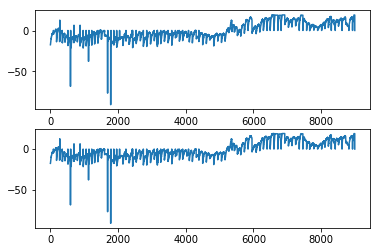

In [216]:
import matplotlib.pyplot as plt
plt_X = np.arange(train_data[X_columns[0,1]].shape[0])
plt.subplot(2, 1, 1)
plt.plot(plt_X,array1copy)
# plt.ylabel('Field temperature')
#设置坐标轴范围
# plt.xlim((2000, 2050))
# plt.ylim((-2, 2))
# plt.ylim((-5, 5))
plt.subplot(2, 1, 2)
plt.plot(plt_X,array1)
# plt.xlim((2000, 2050))
# plt.ylim((-5, 5))

plt.show()

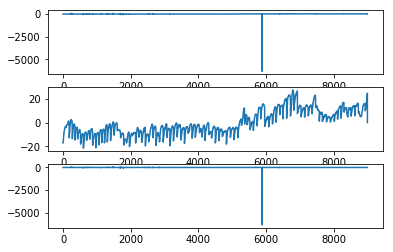

In [128]:
import matplotlib.pyplot as plt
plt_X = np.arange(train_data[X_columns[0,1]].shape[0])
array3 = array1-array2
plt.subplot(3, 1, 1)
plt.plot(plt_X,array1)
# plt.ylabel('Field temperature')
#设置坐标轴范围
# plt.xlim((5889, 5892))
# plt.ylim((-2, 2))
plt.subplot(3, 1, 2)
plt.plot(plt_X,array2)
plt.subplot(3, 1, 3)
plt.plot(plt_X,array3)
plt.show()

In [88]:
import random
import numpy as np
import scipy
# def random_int_list(start, stop, length):
#     start, stop = (int(start), int(stop)) if start <= stop else (int(stop), int(start))
#     length = int(abs(length)) if length else 0
#     random_list = []
#     for i in range(length):
#         random_list.append(random.randint(start, stop))
#     return random_list
# random_list = np.array(random_int_list(1,100,10))
# print(random_list)
# data = del_data_signal(random_list)
# print(data)
# import numpy as np
# df = np.arange(100,0)
# df
# array = np.random.randint(1, high=100, size=30, dtype=np.int32)
# print(array)
# # data = del_data_signal(array)
array = [40, 14, 19, 59, 89,  5, 50, 34, 61, 16, 34, 45, 24, 36, 39, 59, 87, 65, 35, 74, 7, 16, 81, 85, 79, 71, 54, 52, 25, 6]
print(type(array))
# scipy.signal.medfilt(volume, kernel_size=None)
data = scipy.signal.medfilt(array, kernel_size=3)
print(data)

<class 'list'>
[14. 19. 19. 59. 59. 50. 34. 50. 34. 34. 34. 34. 36. 36. 39. 59. 65. 65.
 65. 35. 16. 16. 81. 81. 79. 71. 54. 52. 25.  6.]


In [45]:
# train_data[X_columns[0,1]] 
train_data[X_columns[0,1]].shape

(9000,)

In [40]:
for id in np.arange(X_columns_len):
        deal_column = train_data[X_columns[0,id]]      
X_columns[0,2]

'光照强度'